In [1]:

# import the necessary packages
import matplotlib.pyplot as plt
import numpy as np
import imutils
import cv2


In [2]:
# Main function

def detect_blur_fft(image, size=60, thresh=10, vis=False):
	# grab the dimensions of the image and use the dimensions to
	# derive the center (x, y)-coordinates
	(h, w) = image.shape
	(cX, cY) = (int(w / 2.0), int(h / 2.0))

	# compute the FFT to find the frequency transform, then shift
	# the zero frequency component (i.e., DC component located at
	# the top-left corner) to the center where it will be more
	# easy to analyze
	fft = np.fft.fft2(image)
	fftShift = np.fft.fftshift(fft)

    # check to see if we are visualizing our output
	if vis:
		# compute the magnitude spectrum of the transform
		magnitude = 20 * np.log(np.abs(fftShift))
		# display the original input image
		(fig, ax) = plt.subplots(1, 2, )
		ax[0].imshow(image, cmap="gray")
		ax[0].set_title("Input")
		ax[0].set_xticks([])
		ax[0].set_yticks([])
		# display the magnitude image
		ax[1].imshow(magnitude, cmap="gray")
		ax[1].set_title("Magnitude Spectrum")
		ax[1].set_xticks([])
		ax[1].set_yticks([])
		# show our plots
		plt.show()
    
    # zero-out the center of the FFT shift (i.e., remove low
	# frequencies), apply the inverse shift such that the DC
	# component once again becomes the top-left, and then apply
	# the inverse FFT
	fftShift[cY - size:cY + size, cX - size:cX + size] = 0
	fftShift = np.fft.ifftshift(fftShift)
	recon = np.fft.ifft2(fftShift)

    # compute the magnitude spectrum of the reconstructed image,
	# then compute the mean of the magnitude values
	magnitude = 20 * np.log(np.abs(recon))
	mean = np.mean(magnitude)
	# the image will be considered "blurry" if the mean value of the
	# magnitudes is less than the threshold value
	return (mean, mean <= thresh)



In [3]:
# Test function

def test_blurry(img, thresh=10):
    # resize image and convert it to grayscale
    img = imutils.resize(img, width=500)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # apply our blur detector using the FFT
    (mean, blurry) = detect_blur_fft(gray, size=60, thresh=thresh, vis=True > 0)


    # draw on the image, indicating whether or not it is blurry
    image = np.dstack([gray] * 3)
    color = (0, 0, 255) if blurry else (0, 255, 0)
    text = "Blurry ({:.4f})" if blurry else "Not Blurry ({:.4f})"
    text = text.format(mean)
    cv2.putText(image, text, (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
        color, 2)
    print("[INFO] {}".format(text))


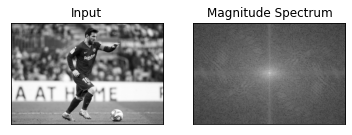

[INFO] Not Blurry (13.2995)


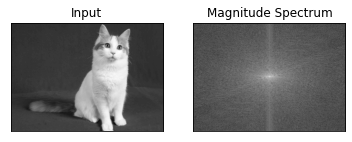

[INFO] Blurry (0.5623)


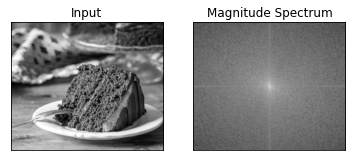

[INFO] Not Blurry (23.0246)


In [4]:
# Testing images
messi = cv2.imread("img/messi.png")
test_blurry(messi)

cat = cv2.imread("img/cat.png")
test_blurry(cat)

cake = cv2.imread("img/cake.png")
test_blurry(cake)

